In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
ct = gpd.read_file(r'zip://../geo/lct_000b16a_e.zip')

In [10]:
cal_ct = ct[ct['CMANAME']=='Calgary']

In [83]:
cal_ct

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
521,8250204.03,0204.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4721866.774 1923999.814, 4721366.451..."
565,8250201.01,0201.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4681607.283 1950607.369, 4681725.897..."
574,8250201.02,0201.02,48,Alberta,825,48825,Calgary,B,"POLYGON ((4666222.751 1976893.989, 4666543.574..."
576,8250200.03,0200.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4653424.837 1948201.417, 4653641.457..."
577,8250204.01,0204.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4710210.854 1899299.514, 4710469.103..."
...,...,...,...,...,...,...,...,...,...
5580,8250001.29,0001.29,48,Alberta,825,48825,Calgary,B,"POLYGON ((4679927.134 1909070.640, 4679982.283..."
5598,8250076.09,0076.09,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689528.946 1930653.354, 4689505.157..."
5599,8250076.12,0076.12,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689957.211 1933804.917, 4690002.617..."
5600,8250076.13,0076.13,48,Alberta,825,48825,Calgary,B,"POLYGON ((4686841.946 1937701.051, 4686829.877..."


<AxesSubplot:>

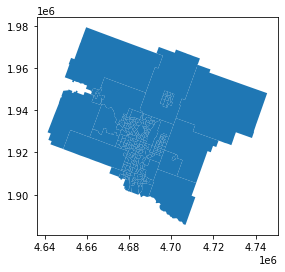

In [85]:
cal_ct.plot()

In [90]:
columns = ['CTUID','Condo','Freehold','Rental','Total']
apt_starts=pd.read_excel('../starts_geo/Apt_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
apt_starts = apt_starts[1:-2]

In [91]:
apt_starts['CTUID']=apt_starts['CTUID'].map('{:.2f}'.format)
apt_starts['CTUID']=apt_starts['CTUID'].astype(str)

In [92]:
cal_ct.merge(apt_starts,on='CTUID')['CTUID']

0     8250204.03
1     8250201.02
2     8250200.03
3     8250206.06
4     8250207.03
         ...    
95    8250017.03
96    8250001.26
97    8250076.12
98    8250076.13
99    8250038.29
Name: CTUID, Length: 100, dtype: object

In [93]:
pd.concat([cal_ct.merge(apt_starts,on='CTUID')['CTUID'],apt_starts['CTUID']]).drop_duplicates(keep=False)

10     8259000.01
49     8259011.00
67     8259009.00
72     8259006.01
73     8259013.01
106    8259008.00
107    8259012.00
Name: CTUID, dtype: object